# 2次元場PDE - 応用編 - 

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from scipy.integrate import solve_ivp

## TDGLのスピノーダル分解

TDGLは時間依存ギンツブルグランダウの略です．オーダーパラメータ$\psi$の保存則が，
$$
    \psi = (\partial_{xx}+\partial_{yy})\mu
$$
であり，$\mu$はGL-Wilsonハミルトニアンの$\psi$微分であって，
$$
    \mu = - \psi + \psi^3 - (\partial_{xx}+\partial_{yy})\psi
$$
定数を除いて書けるとします．　相分離によるスピノーダル分解を見てみましょう．

In [2]:
# parameter
N = Nx = Ny = 40
Δ = Δx = Δy = 1.0
D = (1.0/Δ**2)
A = np.array([[0.0,   D,0.0],
              [D  ,-4*D,  D],
              [0.0,   D,0.0],])
# init
Ψ = 2.0*(np.random.rand(N,N)-0.5)*0.1
Ψ -= Ψ.mean()
init = Ψ.flatten()
# time
t_span=[0.0,20.0]
t_eval=np.linspace(*t_span,3)
# ODEs
def ODEs(t,Ψ):
    Ψ = Ψ.reshape(N,N)
    μ = - Ψ + Ψ**3 - convolve2d(Ψ,A,'same','wrap')
    dΨ = convolve2d(μ,A,'same','wrap')
    return dΨ.flatten()
#
sol = solve_ivp(ODEs,t_span,init,'RK23',t_eval)

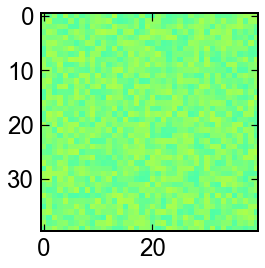

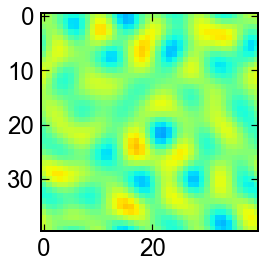

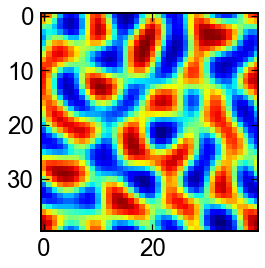

In [3]:
vmax,vmin = sol.y.max(),sol.y.min()
for Ψ in sol.y.T:
    Ψ = Ψ.reshape(N,N)
    fig,ax = plt.subplots(figsize=(4,4))
#     ax.imshow(Ψ,cmap='jet')
    ax.imshow(Ψ,cmap='jet',vmax=vmax,vmin=vmin)
    plt.show()

## 非圧縮性Navie-Stokes方程式